In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Step 1: Load and Clean the Data ---

# Load the dataset
file_path = 'Daily Shares  ETFs 2023.csv'
df = pd.read_csv('data/data.csv')

# Convert 'Daily Date' to datetime objects (handling day/month/year format)
df['Daily Date'] = pd.to_datetime(df['Daily Date'], dayfirst=True, errors='coerce')

# Function to clean numeric columns (remove commas and convert to float)
def clean_currency(x):
    if isinstance(x, str):
        return pd.to_numeric(x.replace(',', ''), errors='coerce')
    return x

# Apply cleaning to relevant columns
numeric_cols = ['Closing Price - VWAP (GH¢)', 'Total Value Traded (GH¢)',
                'Total Shares Traded', 'Opening Price (GH¢)']

for col in numeric_cols:
    df[col] = df[col].apply(clean_currency)

# Drop rows with missing dates or Share Codes
df = df.dropna(subset=['Daily Date', 'Share Code'])

# Filter for the year 2025
df_2025 = df[df['Daily Date'].dt.year == 2025].copy()

# Sort data by Share Code and Date to ensure correct start/end calculation
df_2025 = df_2025.sort_values(by=['Share Code', 'Daily Date'])

In [3]:
# --- Step 2: Analyze Performance (Returns & Volatility) ---

# Calculate Daily Returns for Volatility (Standard Deviation)
df_2025['Daily Return'] = df_2025.groupby('Share Code')['Closing Price - VWAP (GH¢)'].pct_change()

# Group by Share Code to calculate Year-To-Date (YTD) metrics
metrics = df_2025.groupby('Share Code').agg(
    Start_Price=('Closing Price - VWAP (GH¢)', 'first'),
    End_Price=('Closing Price - VWAP (GH¢)', 'last'),
    Total_Value_Traded=('Total Value Traded (GH¢)', 'sum'),
    Volatility=('Daily Return', 'std'),
    Days_Traded=('Daily Date', 'nunique')
).reset_index()

# Calculate YTD Return %
metrics['YTD_Return'] = (metrics['End_Price'] - metrics['Start_Price']) / metrics['Start_Price'] * 100

# Filter for liquid stocks (e.g., more than 1,000 GH¢ traded in the year to avoid penny stocks with no volume)
liquid_stocks = metrics[metrics['Total_Value_Traded'] > 1000].copy()

# Sort by YTD Return to find the best performers
top_performers = liquid_stocks.sort_values(by='YTD_Return', ascending=False)

# Display the top 10 stocks
print("Top 10 Performing Stocks in 2025:")
print(top_performers[['Share Code', 'Start_Price', 'End_Price', 'YTD_Return', 'Total_Value_Traded']].head(10))

Top 10 Performing Stocks in 2025:
   Share Code  Start_Price  End_Price   YTD_Return  Total_Value_Traded
14       CLYD         0.03       0.46  1433.333333        3.430647e+04
40        SIC         0.27       1.20   344.444444        8.162919e+06
19        EGH         6.50      25.00   284.615385        8.669465e+06
24        GCB         6.37      20.10   215.541601        2.315811e+08
4      ACCESS         5.20      16.20   211.538462        1.050979e+07
44      TOTAL        13.12      40.30   207.164634        4.230698e+07
41     SOGEGH         1.50       4.49   199.333333        1.790522e+07
16        CPC         0.02       0.05   150.000000        5.263440e+03
21        ETI         0.31       0.77   148.387097        1.189973e+07
10       BOPP        25.26      55.82   120.981789        1.537324e+06


C:\Users\Administrator\AppData\Local\Temp\ipykernel_25800\4243517230.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_2025['Daily Return'] = df_2025.groupby('Share Code')['Closing Price - VWAP (GH¢)'].pct_change()


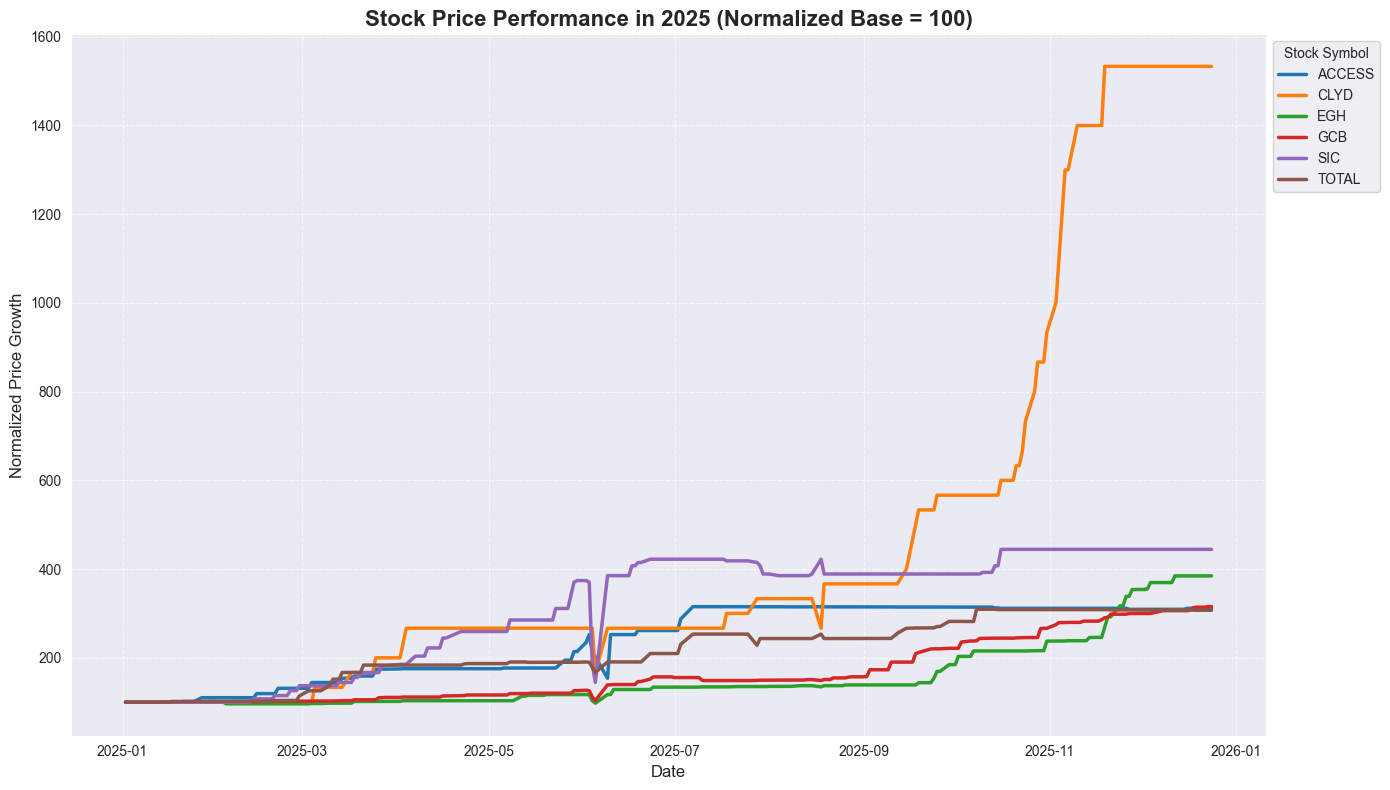

In [4]:

# --- Step 3: Visualization ---

# Select the top 6 stocks for plotting
top_symbols = top_performers['Share Code'].head(6).tolist()
df_viz = df_2025[df_2025['Share Code'].isin(top_symbols)].copy()

# Normalize prices to start at 100 (allows comparing growth relative to each other)
df_viz['Normalized_Price'] = df_viz.groupby('Share Code')['Closing Price - VWAP (GH¢)'].transform(lambda x: x / x.iloc[0] * 100)

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_viz, x='Daily Date', y='Normalized_Price', hue='Share Code', linewidth=2.5)

# Formatting the chart
plt.title('Stock Price Performance in 2025 (Normalized Base = 100)', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Price Growth', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Stock Symbol', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or Show the plot
plt.savefig('best_stocks_2026_analysis.png')
plt.show()

### Include Stocks from my portfolio

In [6]:
# --- Step 1: Load and Clean the Data ---

# Load the dataset
file_path = 'Daily Shares  ETFs 2023.csv'
df = pd.read_csv('data/data.csv')

# Convert 'Daily Date' to datetime objects (handling day/month/year format)
df['Daily Date'] = pd.to_datetime(df['Daily Date'], dayfirst=True, errors='coerce')

# Function to clean numeric columns (remove commas and convert to float)
def clean_currency(x):
    if isinstance(x, str):
        return pd.to_numeric(x.replace(',', ''), errors='coerce')
    return x

# Apply cleaning to relevant columns
numeric_cols = ['Closing Price - VWAP (GH¢)', 'Total Value Traded (GH¢)',
                'Total Shares Traded', 'Opening Price (GH¢)']

for col in numeric_cols:
    df[col] = df[col].apply(clean_currency)

# Drop rows with missing dates or Share Codes
df = df.dropna(subset=['Daily Date', 'Share Code'])

# Filter for the year 2025
df_2025 = df[df['Daily Date'].dt.year == 2025].copy()
df_2024 = df[df['Daily Date'].dt.year == 2024].copy()
df_2023 = df[df['Daily Date'].dt.year == 2023].copy()

# Sort data by Share Code and Date to ensure correct start/end calculation
df_2025 = df_2025.sort_values(by=['Share Code', 'Daily Date'])
df_2024 = df_2024.sort_values(by=['Share Code', 'Daily Date'])
df_2023 = df_2023.sort_values(by=['Share Code', 'Daily Date'])

In [9]:
# --- Step 2: Analyze Performance (Returns & Volatility) ---

# Calculate Daily Returns for Volatility (Standard Deviation)
df_2025['Daily Return'] = df_2025.groupby('Share Code')['Closing Price - VWAP (GH¢)'].pct_change()
df_2024['Daily Return'] = df_2024.groupby('Share Code')['Closing Price - VWAP (GH¢)'].pct_change()
df_2023['Daily Return'] = df_2023.groupby('Share Code')['Closing Price - VWAP (GH¢)'].pct_change()

# Group by Share Code to calculate Year-To-Date (YTD) metrics
metrics25 = df_2025.groupby('Share Code').agg(
    Start_Price=('Closing Price - VWAP (GH¢)', 'first'),
    End_Price=('Closing Price - VWAP (GH¢)', 'last'),
    Total_Value_Traded=('Total Value Traded (GH¢)', 'sum'),
    Volatility=('Daily Return', 'std'),
    Days_Traded=('Daily Date', 'nunique')
).reset_index()

metrics24 = df_2024.groupby('Share Code').agg(
    Start_Price=('Closing Price - VWAP (GH¢)', 'first'),
    End_Price=('Closing Price - VWAP (GH¢)', 'last'),
    Total_Value_Traded=('Total Value Traded (GH¢)', 'sum'),
    Volatility=('Daily Return', 'std'),
    Days_Traded=('Daily Date', 'nunique')
).reset_index()

metrics23 = df_2023.groupby('Share Code').agg(
    Start_Price=('Closing Price - VWAP (GH¢)', 'first'),
    End_Price=('Closing Price - VWAP (GH¢)', 'last'),
    Total_Value_Traded=('Total Value Traded (GH¢)', 'sum'),
    Volatility=('Daily Return', 'std'),
    Days_Traded=('Daily Date', 'nunique')
).reset_index()

# Calculate YTD Return %
metrics25['YTD_Return'] = (metrics25['End_Price'] - metrics25['Start_Price']) / metrics25['Start_Price'] * 100
metrics24['YTD_Return'] = (metrics24['End_Price'] - metrics24['Start_Price']) / metrics24['Start_Price'] * 100
metrics23['YTD_Return'] = (metrics23['End_Price'] - metrics23['Start_Price']) / metrics23['Start_Price'] * 100

# Filter for liquid stocks (e.g., more than 1,000 GH¢ traded in the year to avoid penny stocks with no volume)
liquid_stocks25 = metrics25[metrics25['Total_Value_Traded'] > 1000].copy()
liquid_stocks24 = metrics24[metrics24['Total_Value_Traded'] > 1000].copy()
liquid_stocks23 = metrics23[metrics23['Total_Value_Traded'] > 1000].copy()

# Sort by YTD Return to find the best performers
top_performers25 = liquid_stocks25.sort_values(by='YTD_Return', ascending=False)
top_performers24 = liquid_stocks24.sort_values(by='YTD_Return', ascending=False)
top_performers23 = liquid_stocks23.sort_values(by='YTD_Return', ascending=False)

# Display the top 10 stocks
print("Top 20 Performing Stocks in 2025:")
print(top_performers25[['Share Code', 'Start_Price', 'End_Price', 'YTD_Return', 'Total_Value_Traded']].head(20))

print("Top 20 Performing Stocks in 2024:")
print(top_performers24[['Share Code', 'Start_Price', 'End_Price', 'YTD_Return', 'Total_Value_Traded']].head(20))


print("Top 20 Performing Stocks in 2023:")
print(top_performers24[['Share Code', 'Start_Price', 'End_Price', 'YTD_Return', 'Total_Value_Traded']].head(20))

Top 20 Performing Stocks in 2025:
   Share Code  Start_Price  End_Price   YTD_Return  Total_Value_Traded
14       CLYD         0.03       0.46  1433.333333        3.430647e+04
40        SIC         0.27       1.20   344.444444        8.162919e+06
19        EGH         6.50      25.00   284.615385        8.669465e+06
24        GCB         6.37      20.10   215.541601        2.315811e+08
4      ACCESS         5.20      16.20   211.538462        1.050979e+07
44      TOTAL        13.12      40.30   207.164634        4.230698e+07
41     SOGEGH         1.50       4.49   199.333333        1.790522e+07
16        CPC         0.02       0.05   150.000000        5.263440e+03
21        ETI         0.31       0.77   148.387097        1.189973e+07
10       BOPP        25.26      55.82   120.981789        1.537324e+06
23        FML         3.70       8.00   116.216216        2.769326e+07
35       RBGH         0.66       1.30    96.969697        2.141805e+06
27       GOIL         1.52       2.95    94

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25800\3997935462.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_2025['Daily Return'] = df_2025.groupby('Share Code')['Closing Price - VWAP (GH¢)'].pct_change()


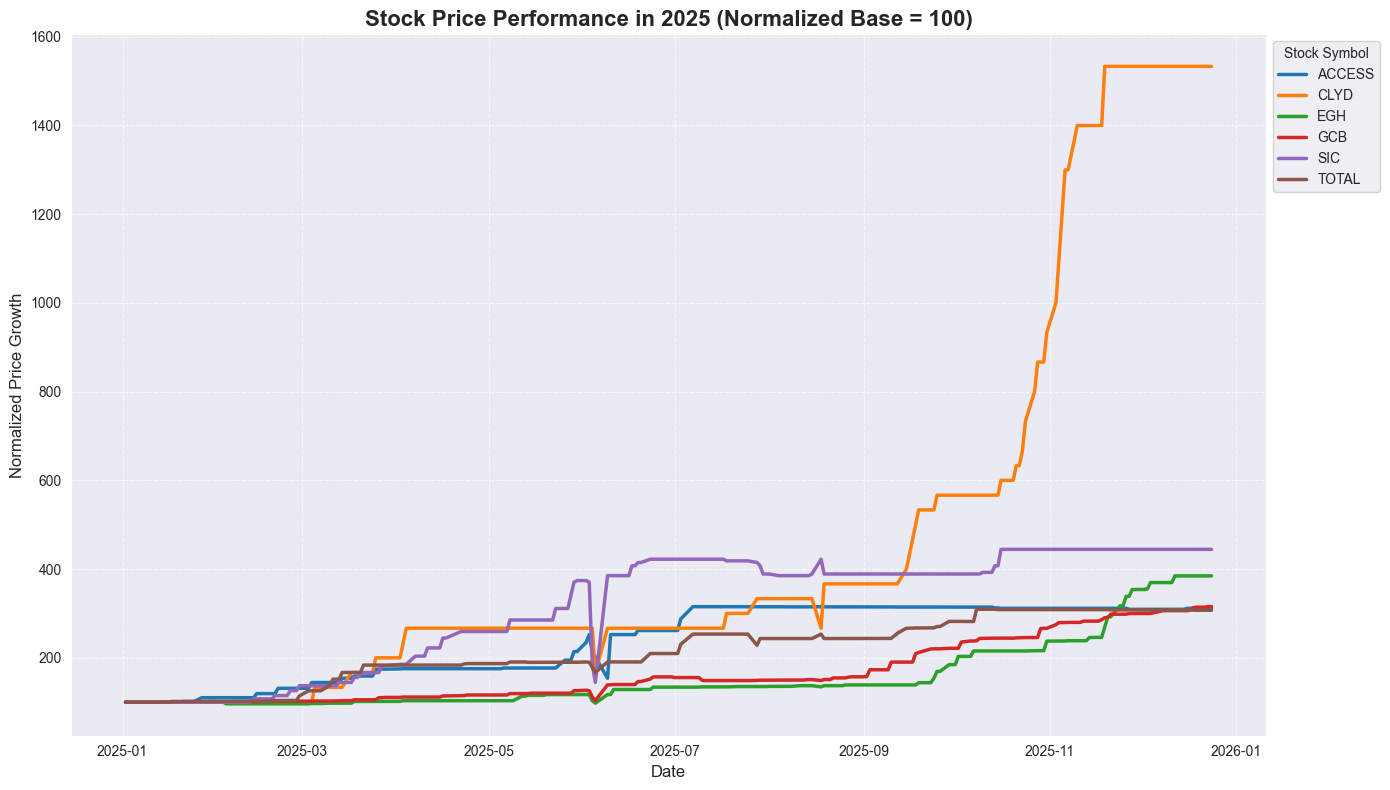

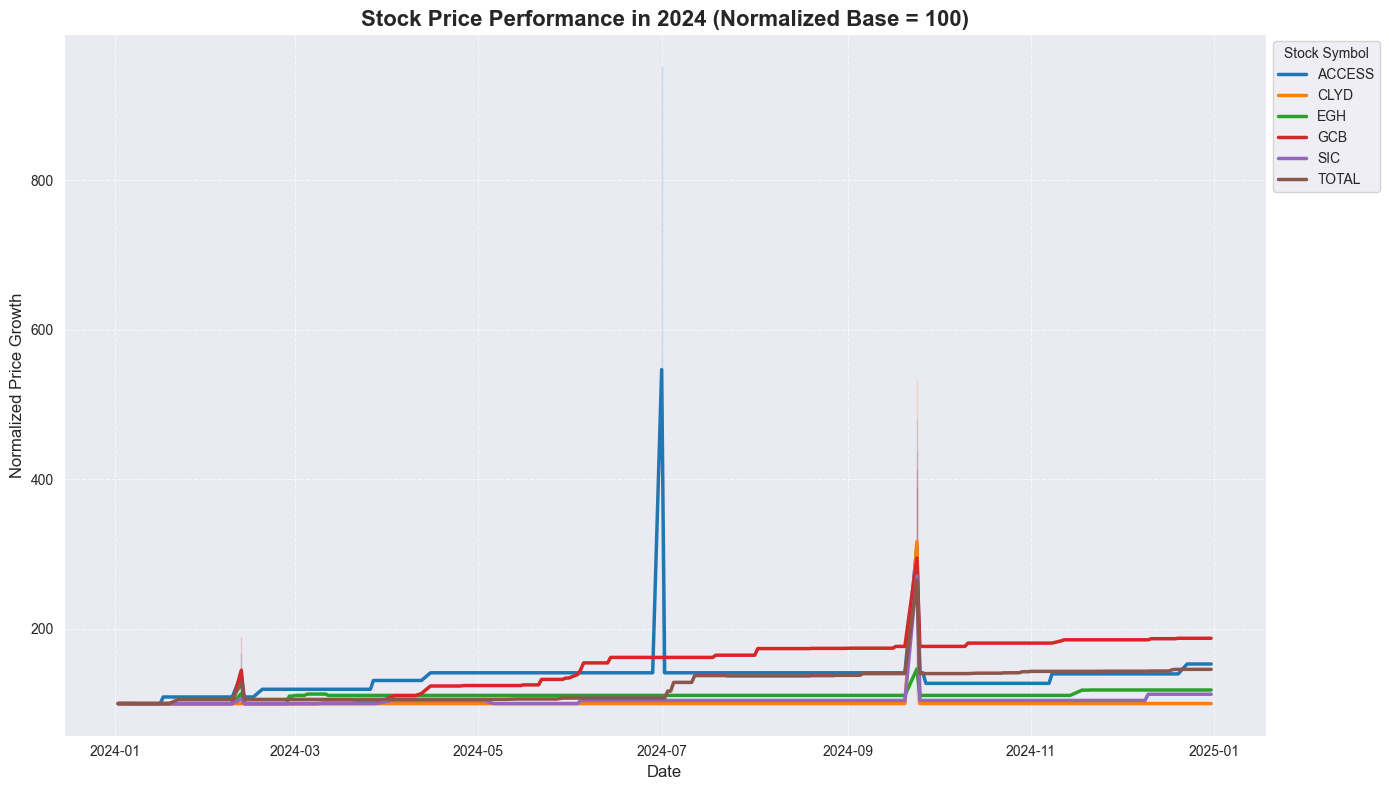

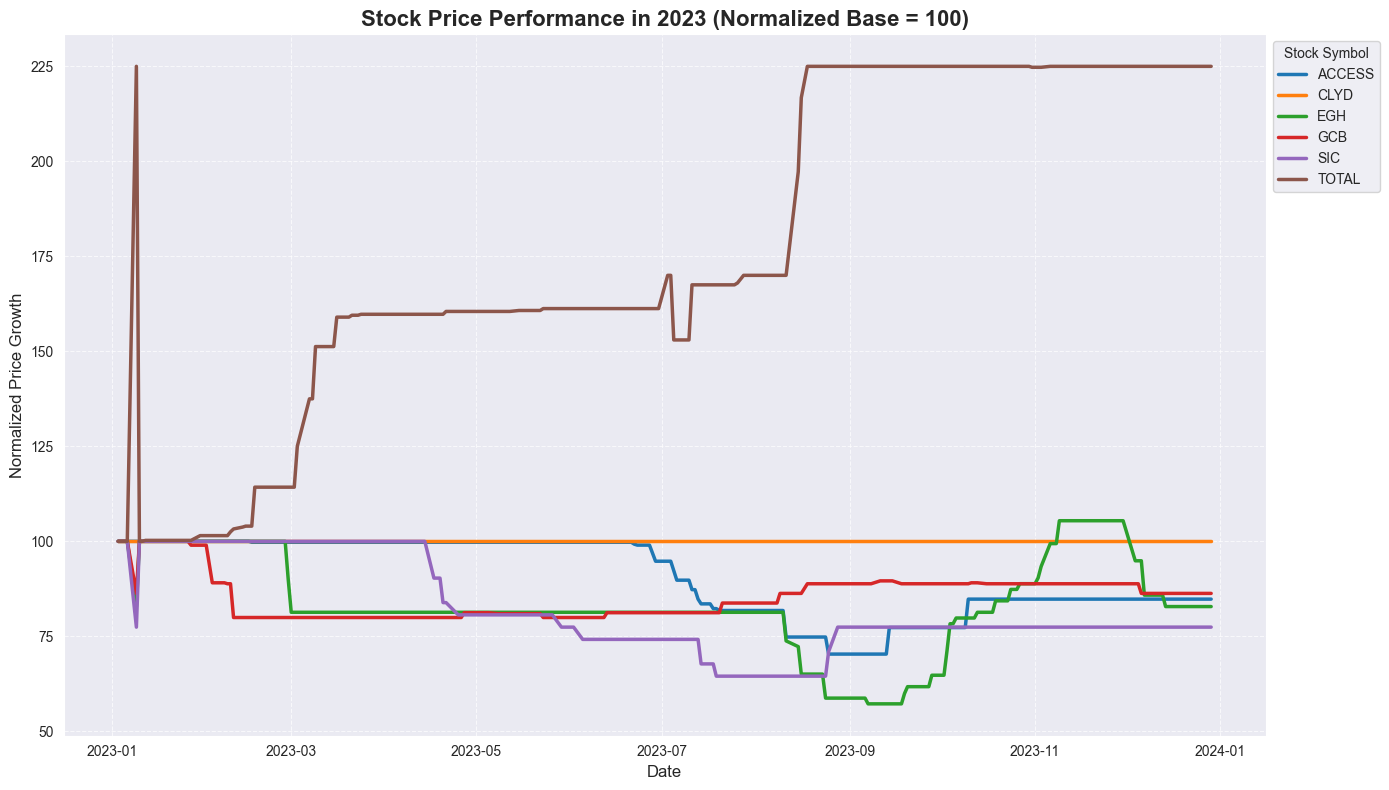

In [11]:

# --- Step 3: Visualization ---

# Select the top 6 stocks for plotting
top_symbols25 = top_performers25['Share Code'].head(6).tolist()
df_viz25 = df_2025[df_2025['Share Code'].isin(top_symbols)].copy()

top_symbols24 = top_performers24['Share Code'].head(6).tolist()
df_viz24 = df_2024[df_2024['Share Code'].isin(top_symbols)].copy()

top_symbols23 = top_performers23['Share Code'].head(6).tolist()
df_viz23 = df_2023[df_2023['Share Code'].isin(top_symbols)].copy()

# Normalize prices to start at 100 (allows comparing growth relative to each other)
df_viz25['Normalized_Price'] = df_viz25.groupby('Share Code')['Closing Price - VWAP (GH¢)'].transform(lambda x: x / x.iloc[0] * 100)
df_viz24['Normalized_Price'] = df_viz24.groupby('Share Code')['Closing Price - VWAP (GH¢)'].transform(lambda x: x / x.iloc[0] * 100)
df_viz23['Normalized_Price'] = df_viz23.groupby('Share Code')['Closing Price - VWAP (GH¢)'].transform(lambda x: x / x.iloc[0] * 100)

# Create the plot
#2025
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_viz25, x='Daily Date', y='Normalized_Price', hue='Share Code', linewidth=2.5)



# Formatting the chart
plt.title('Stock Price Performance in 2025 (Normalized Base = 100)', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Price Growth', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Stock Symbol', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or Show the plot
plt.savefig('visuals/best_stocks_2025_analysis.png')
plt.show()


# Create the plot
#2024
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_viz24, x='Daily Date', y='Normalized_Price', hue='Share Code', linewidth=2.5)



# Formatting the chart
plt.title('Stock Price Performance in 2024 (Normalized Base = 100)', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Price Growth', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Stock Symbol', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or Show the plot
plt.savefig('visuals/best_stocks_2024_analysis.png')
plt.show()



# Create the plot
#2023
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_viz23, x='Daily Date', y='Normalized_Price', hue='Share Code', linewidth=2.5)



# Formatting the chart
plt.title('Stock Price Performance in 2023 (Normalized Base = 100)', fontsize=16, fontweight='bold')
plt.ylabel('Normalized Price Growth', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Stock Symbol', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save or Show the plot
plt.savefig('visuals/best_stocks_2023_analysis.png')
plt.show()

# Investment Recommendation Report for 2026

Based on the historical performance and liquidity analysis of the Ghana Stock Exchange (GSE) data from 2025, here is a structured recommendation for your 2026 investment strategy.

## 1. Executive Summary
The market in 2025 was dominated by the **Financial Services (Banking & Insurance)** and **Energy** sectors. Stocks like **GCB** and **TOTAL** showed exceptional strength by combining high capital appreciation with high liquidity, making them the safest "Blue Chip" bets for 2026. Smaller stocks like **CLYD** showed explosive growth but carry significantly higher risk due to lower trading volumes.

---

## 2. Top Recommended Stocks for 2026

### 🏆 The "Safe Haven" (Blue Chips)
These stocks have the highest liquidity, meaning you can easily buy and sell large volumes without significantly affecting the price.
* **GCB Bank (GCB)**
    * **2025 Performance:** +215.5%
    * **Why Invest:** It is the most liquid stock on the exchange (GH¢ 231M+ traded). It provides a solid foundation for any portfolio with massive institutional support.
* **TotalEnergies (TOTAL)**
    * **2025 Performance:** +207.2%
    * **Why Invest:** A dominant player in the energy sector with high volume (GH¢ 42M). It offers a hedge against banking sector volatility.

### 🚀 High-Growth Picks (Financial Sector)
The banking sector outperformed almost every other industry in 2025.
* **Ecobank Ghana (EGH)**
    * **2025 Performance:** +284.6%
    * **Why Invest:** Strongest growth among the major banks with healthy liquidity.
* **SIC Insurance (SIC)**
    * **2025 Performance:** +344.4%
    * **Why Invest:** The top-performing insurance stock. It has shown consistent momentum throughout the year.

### ⚠️ The Speculative "Moonshot"
* **Clydestone (CLYD)**
    * **2025 Performance:** +1,433%
    * **Why Invest:** It turned GH¢ 1,000 into GH¢ 15,000 in a single year.
    * **Risk Note:** Very low liquidity (only GH¢ 34k traded all year). Only invest "play money" that you are prepared to lose or hold for a long time.

---

## 3. Comparative Performance Table

| Share Code | Sector | 2025 Return | Liquidity (Value Traded) | Recommendation |
| :--- | :--- | :--- | :--- | :--- |
| **GCB** | Banking | 215.5% | **Very High** (GH¢ 231M) | **Strong Buy (Core)** |
| **TOTAL** | Energy | 207.2% | **High** (GH¢ 42M) | **Buy (Diversification)** |
| **EGH** | Banking | 284.6% | **Medium-High** (GH¢ 8.6M) | **Buy (Growth)** |
| **SIC** | Insurance | 344.4% | **Medium** (GH¢ 8.1M) | **Buy (Aggressive)** |
| **ACCESS** | Banking | 211.5% | **Medium** (GH¢ 10.5M) | **Hold/Buy** |
| **CLYD** | Tech/Services | 1,433.3% | **Very Low** (GH¢ 34k) | **Speculative Only** |

---

## 4. Suggested Portfolio Allocation for 2026
To balance risk and reward, consider the following allocation:
* **40% GCB Bank:** Stability and liquidity.
* **30% TOTAL:** Sector diversification.
* **20% EGH or SIC:** Aggressive growth from the financial sector.
* **10% Cash or Small-cap (CLYD):** To take advantage of sudden market spikes.

---


## 5. Other TOP companies to consider
MTN, FML and SOGEGH for growth and dividends

The Consistent Winners (TOTAL, BOPP, MTNGH):

* **TOTAL**(TotalEnergies) and **BOPP** (Benso Oil Palm) are standout performers because they grew significantly in every single year from 2023 to 2025.

* **MTNGH** is the most impressive in terms of stability, delivering high double-digit returns **(59% to 78%)** every year while handling massive trading volumes (over 1 Billion GH¢).

The "Late Bloomers" (**GCB, EGH, SIC, ACCESS**):

These financial stocks actually had a rough or flat 2023 (negative or near 0% returns) but exploded in 2024 and 2025. This suggests a major recovery or structural shift in the banking/insurance sector during the last two years.

---
